<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Linear Regression
Data available at https://www.statlearning.com/resources-first-edition

We are going to be working with a dataset of compiled statistics about different car models.  Our goal is to develop a model to predict fuel efficiency (mpg) based on other known characteristics of the car and engine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# This downloads the csv data files into the same directory where you have saved this notebook
import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'Auto.csv':'https://storage.googleapis.com/aipi_datasets/Auto.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [3]:
def load_data(filename):
    # Read in data
    data = pd.read_csv(filename)
    # Remove rows with missing values
    data = data[data['horsepower'] != '?'].copy()
    return data

data = load_data('Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Simple Linear Regression
Let's start with a simple linear regression and create a model for mpg using only horsepower as an input

In [4]:
def prep_data(data,pct):
    # Define the features and response (X and y)
    X = data['horsepower'].astype(int).values.reshape(-1,1)
    y = data['mpg'].astype(float)

    # Split into training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=pct)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = prep_data(data,pct=0.2)

In [5]:
def run_lr(X_train,y_train,X_test):
    # Let's use a Simple Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train,y_train)

    # Get the predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    return train_preds, test_preds, model

MSE train: 24.430, test: 22.026


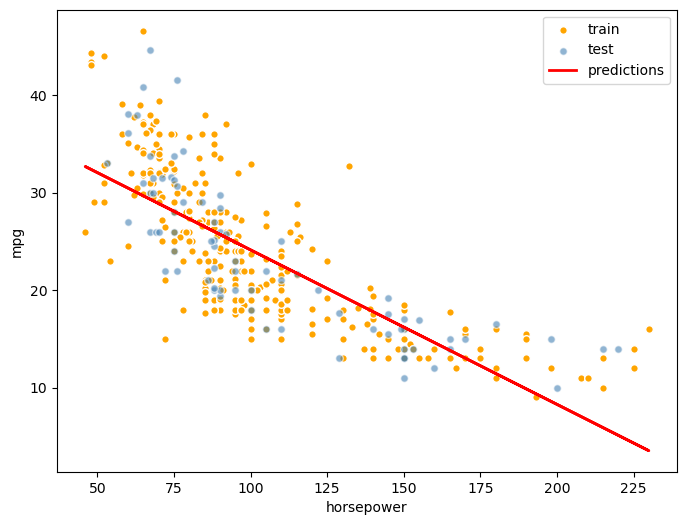

In [6]:
train_preds, test_preds, model = run_lr(X_train,y_train,X_test)

# Calculate MSE
train_mse = 1/len(y_train)*np.sum((train_preds-y_train)**2)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))

# Look at how well the model is fitting the data
plt.figure(figsize=(8,6))
plt.scatter(X_train,y_train,color='orange',edgecolor='white',s=30,label='train') # Plot training data
plt.scatter(X_test,y_test,color='steelblue',edgecolor='white',s=30,alpha=0.6,label='test') # Plot test data
plt.plot(X_train,train_preds,color='red',lw=2,label='predictions') # Plot predictions
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()

## Multiple Linear Regression
Now let's create a new model using additional numerical features

In [7]:
def prep_data_allfeats(data,pct):
    # Define the features and response (X and y)
    X = data[['cylinders','displacement','horsepower','weight','acceleration','year']].copy().astype(int)
    y = data['mpg'].copy().astype(float)

    # Split into training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=pct)
    return X_train,X_test,y_train,y_test

In [8]:
# Split our data and run the model
X_train,X_test,y_train,y_test = prep_data_allfeats(data,pct=0.2)
train_preds, test_preds, model = run_lr(X_train,y_train,X_test)

# Calculate MSE
train_mse = 1/len(y_train)*np.sum((train_preds-y_train)**2)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))

MSE train: 11.539, test: 11.953


In [9]:
# Look at the coefficients of our model
coef = model.coef_
intercept = model.intercept_

# Print out the equation
equation = 'y = {:.3f} + '.format(intercept) + ' + '.join(['{:.3f}*{}'.format(coef,var) for coef,var in zip(coef,X_train.columns)])
print(equation)

y = -14.813 + -0.243*cylinders + 0.007*displacement + 0.005*horsepower + -0.007*weight + 0.154*acceleration + 0.742*year


### *Using your intuition about car engines, do you think the sign (+/-) of these coefficients makes sense given the relationships between these variables and engine fuel economy?*

### Check for collinearity of features

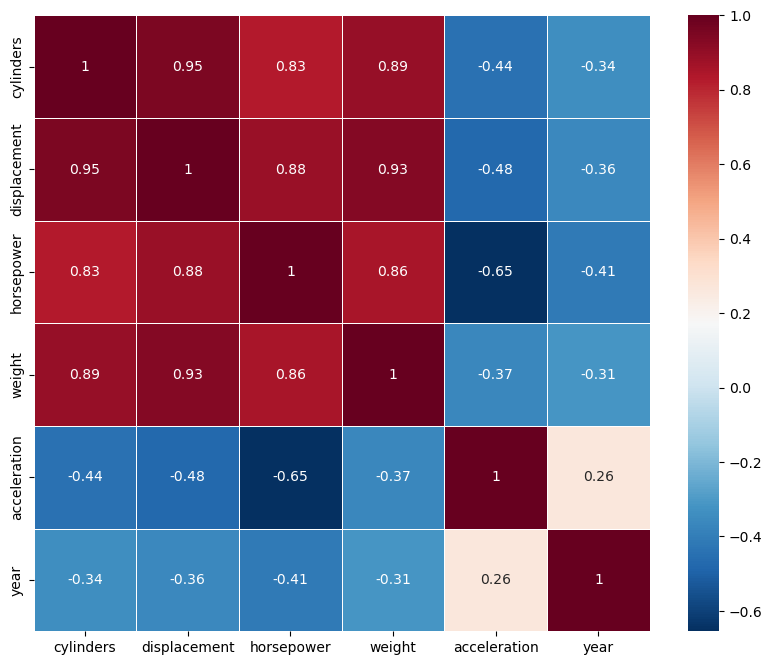

In [10]:
# Examine correlations between variables using correlation matrix
plt.figure(figsize=(10,8))
cm = X_train.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

## Reduce Feature Set
Since we have high collinearity between several of our features, let's try modeling again using a reduced feature set.  Complete the below function to train and evaluate a model using the reduced set of features provided as input.

Your function should do the following:  
- Split your data into the input set and targets, and then split into training and test sets  
- Train a model on the training data, and then calculate and display the MSE on the training set and test set  
- Display the equation of your trained model

In [16]:
def model_lessfeats(data,feats,pct):
    '''
    Train and evaluate a linear regression model using the features provided

    Inputs:
        data(pd.DataFrame): raw data
        feats(list): list of features to include
        pct(float): percentage of data to use for the test set

    Returns:
        train_mse(float): MSE on the training set
        test_mse(float): MSE on the test set
        equation(str): equation of your model as a string
    '''
    ### BEGIN SOLUTION ###
    X = data[feats].copy()
    y = data['mpg'].copy()
    
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=pct)
    
    train_preds, test_preds, model = run_lr(X_train,y_train,X_test)
    train_mse = 1/len(y_train)*np.sum((train_preds-y_train)**2)
    test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
    
    coef = model.coef_
    intercept = model.intercept_

    equation = 'y = {:.3f} + '.format(intercept) + ' + '.join(['{:.3f}*{}'.format(coef,var) for coef,var in zip(coef,X_train.columns)])
    return train_mse, test_mse, equation
    ### END SOLUTION ###

feats = ['horsepower','displacement','acceleration','year']
train_mse, test_mse, equation = model_lessfeats(data,feats,pct=0.2)
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))
print(equation)

MSE train: 15.128, test: 13.845
y = -9.098 + -0.061*horsepower + -0.037*displacement + -0.352*acceleration + 0.676*year


### *How did the modeled relationship between the remaining features and the target change as we removed the collinear variables?  Did any of the relationships change from positive correlation to negative? Do you now think that the coefficients make sense?*

## Polynomial Regression
Let's now see if we can improve our performance on this task using a polynomial regression model rather than a degree-1 standard linear regression.

To easily implement polynomial regression in Scikit Learn we can use the PolynomialFeatures class to transform our input data to any degree

In [12]:
# Example of using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
x = np.array([[2], [3], [4]])
poly = PolynomialFeatures(3, include_bias=True)
x_transform = poly.fit_transform(x)
print('Original inputs:')
print(x)
print('Inputs after polynomial transformation')
print(x_transform)


Original inputs:
[[2]
 [3]
 [4]]
Inputs after polynomial transformation
[[ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


Complete the below function `train_poly()` which fits a polynomial regression of the specified degree on the training data.  The function should return the polynomial transform and the trained model.

In [13]:
def train_poly(X_train,y_train,degree):
    '''
    Create polynomial features and trains a linear model on them

    Inputs:
        X_train(np.ndarray): Training set inputs
        y_train(np.ndarray): Training set targets
        degree: degree of polynomial regression

    Returns:
        poly_transform(sklearn.preprocessing.PolynomialFeatures): polynomial transform used
        poly_model(sklearn.base.BaseEstimator): trained polynomial regression model
    '''
    ### BEGIN SOLUTION ###
    poly_transform = PolynomialFeatures(degree=degree,include_bias=True)
    X_train_poly = poly_transform.fit_transform(X_train)
    print(X_train_poly.shape)
    print(X_train.shape)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly,y_train)
    
    return poly_transform, poly_model
    ### END SOLUTION ###

Now run the following cell to test your polynomial regression function and take note of its performance on the training and test sets relative to the performance of the standard degree-1 linear regression model.

In [14]:
def test_model(model, X_test, y_test,transform=None):
    # Computes the MSE for a model
    if transform is not None:
        X_test = transform.transform(X_test)
    preds = model.predict(X_test)
    mse = 1/len(y_test)*np.sum((preds-y_test)**2)
    return mse

degree=2
poly_transform, model = train_poly(X_train,y_train,degree)
train_mse = test_model(model, X_train, y_train, poly_transform)
test_mse = test_model(model, X_test, y_test, poly_transform)

print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))

(313, 28)
(313, 6)
MSE train: 7.061, test: 6.632
